### Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using beautifulsoup and load to a pandas dataframe.

In [160]:
import urllib.request
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [161]:
#http request
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')
#result of that request
result = urllib.request.urlopen(request)
#reand and store the result
resulttext = result.read()

In [162]:
#We use the BS constructor to pull data from HTML or XML document
soup = BS(resulttext, 'html.parser')
#The first argument is what we want to make soup from.
#The second argument tells beautifulsoup how we want to handle what was passed in as the first argument

In [163]:
#print(soup.prettify())

In [164]:
quake_table = soup.find('table', 'sortable wikitable')
type(quake_table)

bs4.element.Tag

In [165]:
#print(quake_table.prettify())

In [166]:
#creating empty list for data
data_for_df = []

In [167]:
table_for_looping = quake_table.findAll('tr')
type(table_for_looping)

bs4.element.ResultSet

In [168]:
#based on xtreme united's notebook
for row in table_for_looping:
    cells = row.find_all('td')
    cells = [cell.text.strip() for cell in cells]
    data_for_df.append(cells)

### loading data into pandas data frame

In [169]:
quake_df = pd.DataFrame(data_for_df)
quake_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,None,None,None,None,None,None,None,None,None,None,None,None
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,


In [170]:
# naming columns
quake_df.columns = ['origin','country','lat','long','depth','mag','sec_effects','shaking_death','pde_total','utsu_total','emdat_total','other']

In [171]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
0,None,None,None,None,None,None,None,None,None,None,None,None
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,


In [172]:
# some basic data exploration
quake_df.shape

(1341, 12)

In [173]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1340 non-null object
long             1340 non-null object
depth            1340 non-null object
mag              1340 non-null object
sec_effects      1340 non-null object
shaking_death    1340 non-null object
pde_total        1340 non-null object
utsu_total       1340 non-null object
emdat_total      1340 non-null object
other            1338 non-null object
dtypes: object(12)
memory usage: 125.8+ KB


In [174]:
quake_df.drop(0, inplace=True)

In [175]:
quake_df.head(10)

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
2,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
5,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
6,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
7,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
8,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
9,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
10,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


### Replacing empty strings with NAN

In [176]:
quake_df['shaking_death'] = quake_df['shaking_death'].fillna(value = 'NaN')

In [177]:
quake_df = quake_df.apply(lambda x: x.str.strip()).replace('', np.nan)

In [178]:
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other
1,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
3,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
5,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN


In [179]:
quake_df.other.value_counts(dropna = False)

NaN                                    1303
1                                         3
521[19]                                   1
26271[11] 26000[12]                       1
8000+                                     1
33[8]                                     1
111+                                      1
222,517[17]                               1
2489[10]                                  1
601 (as of October 30, 2011)              1
15894[20]                                 1
1404                                      1
1,115                                     1
79                                        1
42                                        1
3500                                      1
2041                                      1
164[6]                                    1
181                                       1
215                                       1
60[16]                                    1
2,698                                     1
200                             

### Removing footnotes from the 'Other Source Deaths' column

In [180]:
quake_df['other'] = quake_df.other.str.replace(r'+','')
quake_df['other'] = quake_df.other.str.replace(r',','')
quake_df['other'] = quake_df.other.str.extract('(\d+)', expand = True)

### Cleaning and converting magnitude column to float 

In [181]:
#quick inspection of magnitude column
quake_df.mag.value_counts(dropna = False)

7.2 Mw         46
6.5 Mw         38
5.6 Mw         38
7.1 Mw         37
5.8 Mw         34
6.8 Muk        34
6.4 Mw         32
5.9 Mw         32
6.3 Mw         32
6.1 Mw         31
6.2 Mw         31
7.5 Mw         31
5.5 Mw         29
6.0 Mw         28
6.6 Mw         27
5.4 Mw         26
7.7 Mw         25
7.3 Mw         25
6.9 Mw         25
7.6 Mw         24
6.0 Muk        24
5.3 Mw         23
5.7 Mw         23
7.0 Mw         22
6.8 Ms         22
6.7 Mw         21
6.8 Mw         19
7.8 Mw         17
5.2 Mw         17
7.4 Mw         17
               ..
2.0 ML          1
8.1 mb          1
5.1 Lg          1
6.8 MJMA        1
2.3 ML          1
7.9 Ms          1
5.2 ML          1
8.6 Mw          1
9.5 Muk         1
8.3 Muk         1
5.2 Muk         1
5.4 Muk         1
8.2 Muk         1
6.0 ML          1
8.6 Muk         1
8.8 Mw [18]     1
4.6 Mb          1
8.4 Muk         1
7.5 Ms          1
4.0 Lg          1
9.0 Muk         1
7.8 Ms          1
4.8 Muk         1
9.1 Mw          1
8.0 Muk   

In [182]:
#cleaning magnitude column
quake_df['mag'] = quake_df.mag.str.extract('(\d\.\d)', expand = True)

In [183]:
#spot check
quake_df.mag.value_counts(dropna = False)

6.8    76
6.9    60
6.5    58
7.2    57
6.0    56
5.6    56
5.8    50
6.3    50
7.1    49
6.2    48
5.5    48
5.9    47
6.4    46
7.0    43
6.6    40
7.5    39
6.1    39
5.7    38
6.7    38
7.3    36
5.4    32
7.6    30
7.7    28
5.3    27
5.2    25
7.4    23
7.8    19
4.9    18
7.9    18
5.0    17
       ..
8.0    10
4.8    10
4.7     7
8.2     7
8.3     6
4.5     6
4.6     6
4.2     6
4.3     6
4.4     3
2.7     3
3.8     3
8.6     3
8.5     2
3.4     2
8.8     2
2.8     2
9.0     2
8.4     2
NaN     2
9.5     1
9.1     1
2.2     1
2.6     1
3.5     1
8.7     1
9.2     1
4.0     1
2.0     1
2.3     1
Name: mag, Length: 62, dtype: int64

In [184]:
quake_df.mag = quake_df['mag'].apply(float)

In [185]:
### Cleaning the country column

In [186]:
quake_df['country'] = quake_df.country.str.replace(r'\(.*','')

### Cleaning and then aggregating the death count columns by maximum value

In [187]:
#cleaning emdat total deaths
quake_df['emdat_total'] = quake_df.emdat_total.str.extract('(\d+)', expand = True)

In [188]:
#converting these columns to floats
quake_df['other'] = quake_df['other'].astype(float)
quake_df['pde_total'] = quake_df['pde_total'].astype(float)
quake_df['utsu_total'] = quake_df['utsu_total'].astype(float)
quake_df['emdat_total'] = quake_df['emdat_total'].astype(float)

In [189]:
# aggregting these by the max value

# initialize column as empty strings
quake_df['deaths'] = ''

#select by dropping columns
deathcols = quake_df.columns.drop(['origin', 'country', 'lat', 'long', 'depth', 'mag', 'sec_effects', 'shaking_death'])

#create by subsetting df
death_df = quake_df[deathcols]

#populating deaths column with max of the subset
quake_df['deaths'] = death_df.max(axis=1)

In [190]:
# quick spotcheck
quake_df['deaths'].value_counts(dropna=False)

 1.0         243
 2.0         139
NaN           66
 3.0          60
 4.0          49
 5.0          40
 6.0          27
 7.0          27
 9.0          24
 10.0         23
 8.0          22
 11.0         20
 15.0         18
 12.0         14
 20.0         14
 30.0         13
 26.0         10
 100.0         9
 18.0          9
 17.0          8
 13.0          8
 200.0         8
 1000.0        8
 35.0          7
 60.0          7
 22.0          7
 500.0         7
 24.0          7
 16.0          7
 50.0          7
            ... 
 270.0         1
 32610.0       1
 101.0         1
 552.0         1
 125.0         1
 85.0          1
 65.0          1
 380.0         1
 420.0         1
 680.0         1
 91.0          1
 93.0          1
 143.0         1
 222.0         1
 428.0         1
 1115.0        1
 2800.0        1
 130.0         1
 183.0         1
 233.0         1
 295.0         1
 255.0         1
 275.0         1
 450.0         1
 3500.0        1
 1879.0        1
 200000.0      1
 601.0        

In [191]:
quake_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 13 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1326 non-null object
long             1326 non-null object
depth            1250 non-null object
mag              1338 non-null float64
sec_effects      373 non-null object
shaking_death    739 non-null object
pde_total        750 non-null float64
utsu_total       1027 non-null float64
emdat_total      560 non-null float64
other            37 non-null float64
deaths           1274 non-null float64
dtypes: float64(6), object(7)
memory usage: 146.6+ KB


In [192]:
### making origin column to datetime objects

In [193]:
quake_df['origin'] = pd.to_datetime(quake_df['origin'])

In [194]:
# adding the year to a new column
quake_df['year'] = pd.DatetimeIndex(quake_df['origin']).year

### Ready to start exploring data for insights

In [195]:
quake_df

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths,year
1,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
2,1900-07-12 06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900
3,1900-10-29 09:11:00,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900
4,1901-02-15 00:00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901
5,1901-03-31 07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901
6,1901-08-09 09:23:00,Japan,40.500,142.500,35,7.2,T,NaN,NaN,NaN,NaN,NaN,NaN,1901
7,1901-11-15 20:15:00,New Zealand,-43.000,173.000,0,6.8,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1901
8,1902-01-30 14:01:00,Japan,40.500,141.300,35,6.9,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1902
9,1902-02-13 09:39:00,Azerbaijan,40.700,48.600,15,6.9,NaN,NaN,NaN,86.0,NaN,NaN,86.0,1902
10,1902-03-09 07:46:00,Turkey,40.700,33.600,NaN,5.5,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1902


### Visualizations

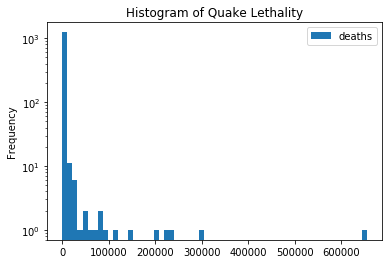

In [196]:
quake_df.deaths.plot(kind = 'hist', legend = True, bins = 60, logy = True, logx = False, title = 'Histogram of Quake Lethality')
plt.show()

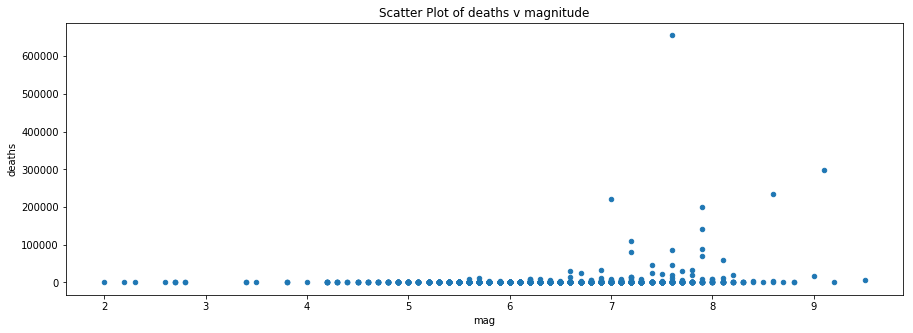

In [197]:
quake_df.plot(kind = 'scatter', y='deaths', x='mag', legend = True, title = 'Scatter Plot of deaths v magnitude', figsize = (15,5))
plt.show()

# Is the lethality of quakes changing over time?

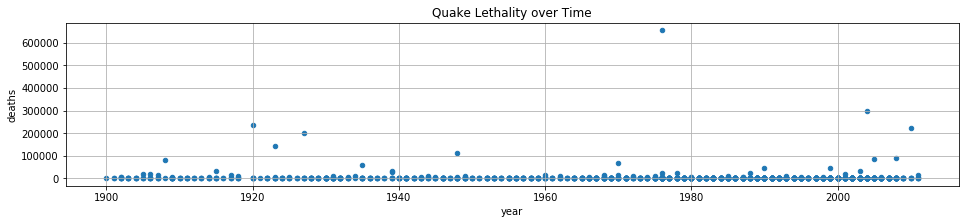

In [198]:
quake_df.plot(kind = 'scatter', x='year', y='deaths', 
              figsize=(16,3), title = 'Quake Lethality over Time', 
              fontsize=10, grid = True)
plt.show()

### linear regression of quake lethality over time

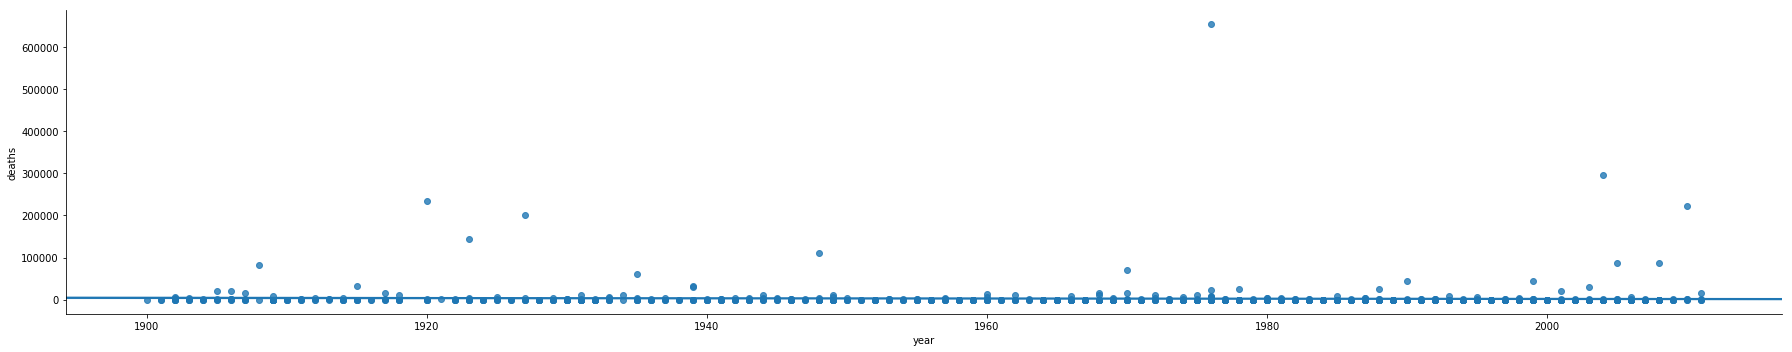

In [199]:
sns.lmplot(x='year', y='deaths', data=quake_df, aspect = 5)
figsize=(30,4)
plt.show()

It would appear that in general lethality is not changing over time. If we aggregate the linear regression by magnitude we notice one regression line seems to be decreasing over time.

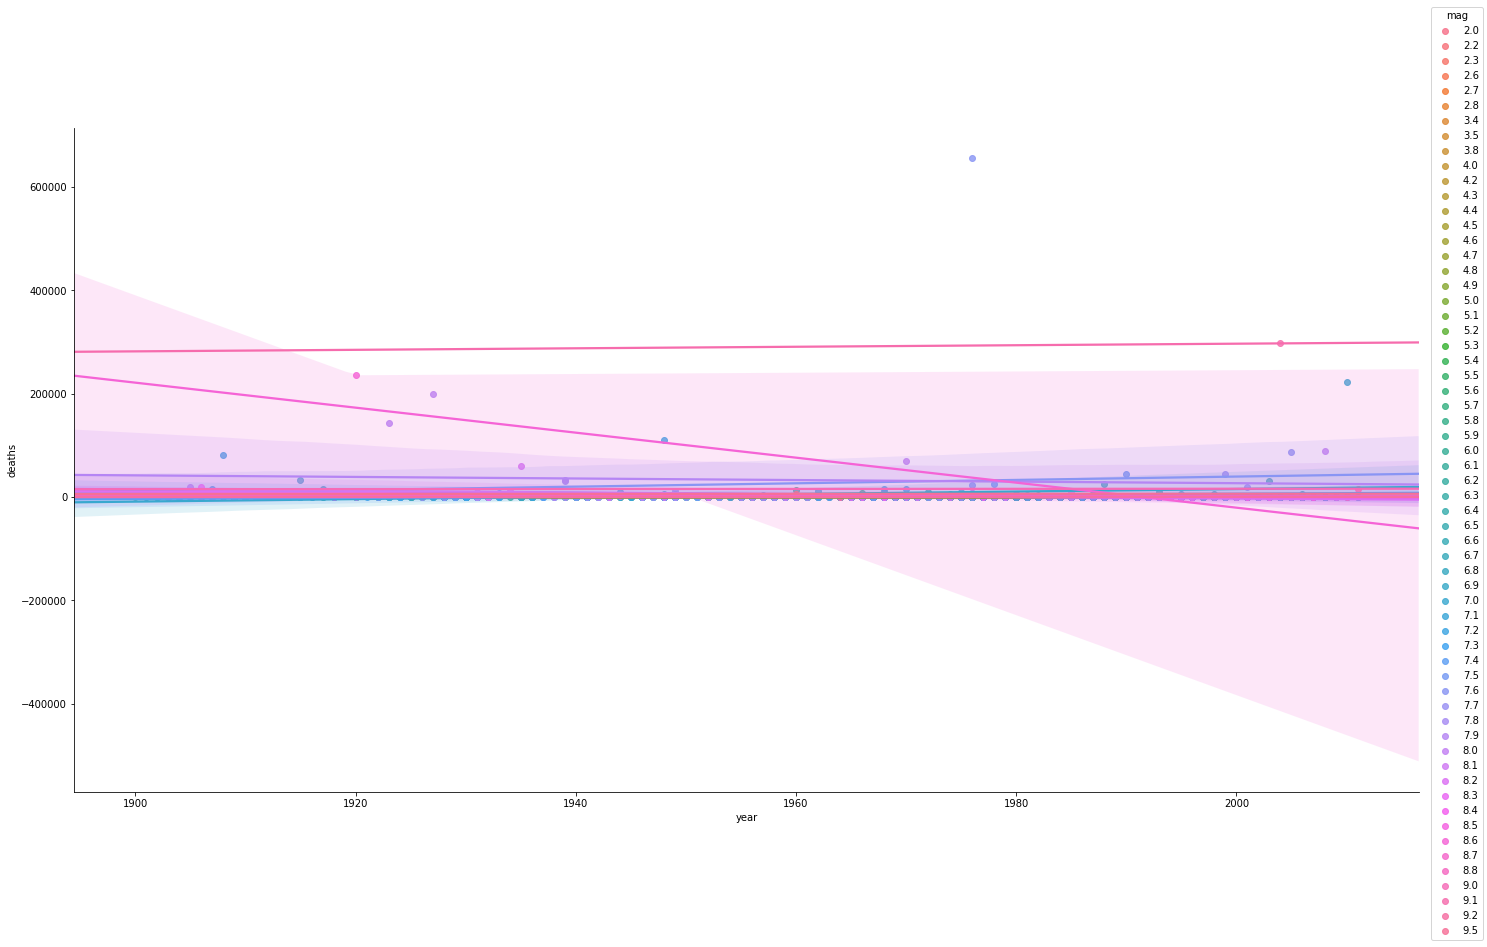

In [200]:
sns.lmplot(x='year', y='deaths', data=quake_df, aspect = 2, size = 10, hue='mag')
plt.show()

However this may be a consequence of overfitting based on float magnitude values. If we round the magnitudes to integers we see no apparent correlation

In [201]:
# adding a column for rounded magnitude values
quake_df['rounded_mag'] = quake_df.mag.round(decimals=0)
quake_df.head()

,origin,country,lat,long,depth,mag,sec_effects,shaking_death,pde_total,utsu_total,emdat_total,other,deaths,year,rounded_mag
1,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,7.0
2,1900-07-12 06:25:00,Turkey,40.300,43.100,NaN,5.9,NaN,NaN,NaN,140.0,NaN,NaN,140.0,1900,6.0
3,1900-10-29 09:11:00,Venezuela,11.000,-66.000,0,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900,8.0
4,1901-02-15 00:00:00,China,26.000,100.100,0,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,6.0
5,1901-03-31 07:11:00,Bulgaria,43.400,28.700,NaN,6.4,NaN,NaN,NaN,4.0,NaN,NaN,4.0,1901,6.0


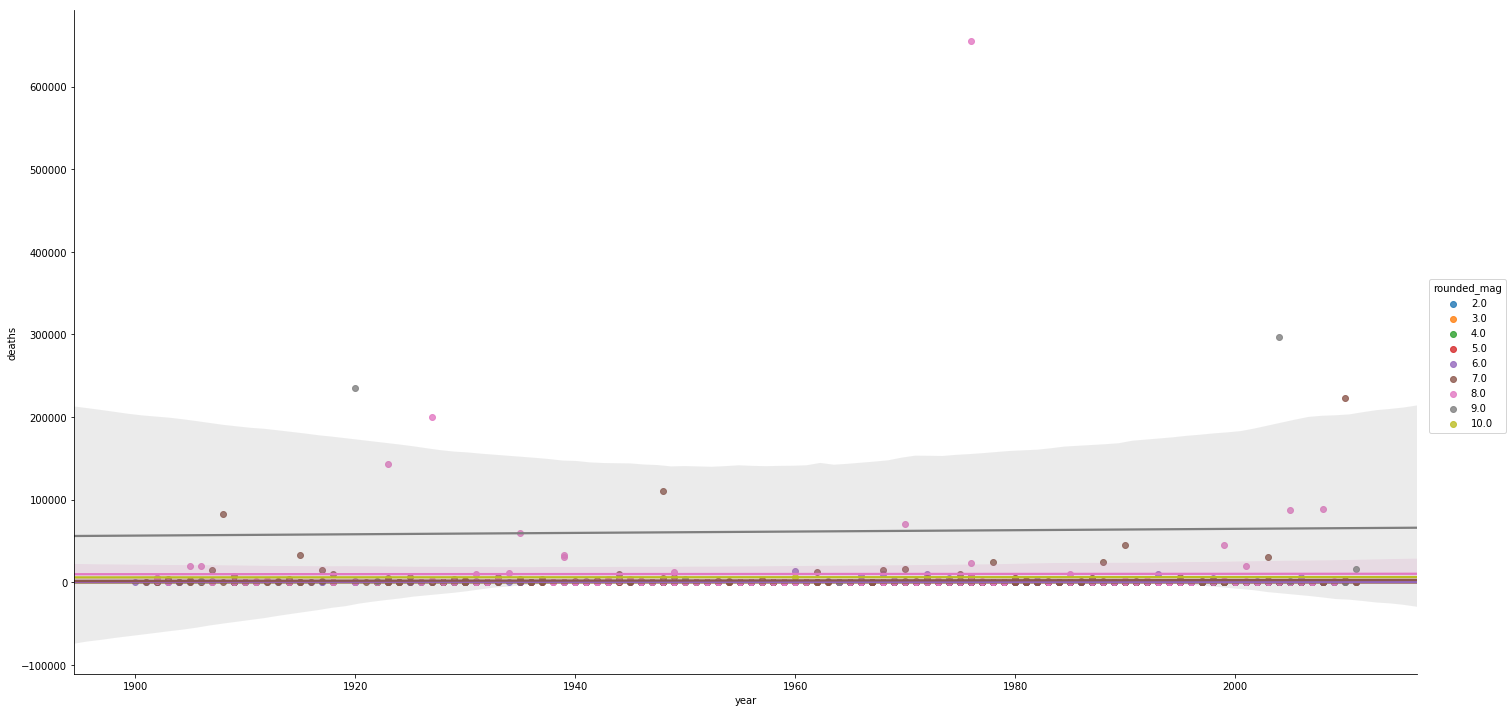

In [202]:
sns.lmplot(x='year', y='deaths', data=quake_df, aspect = 2, size = 10, hue='rounded_mag')
plt.show()

# Can we plot lethality across time, aggregated by quake type?

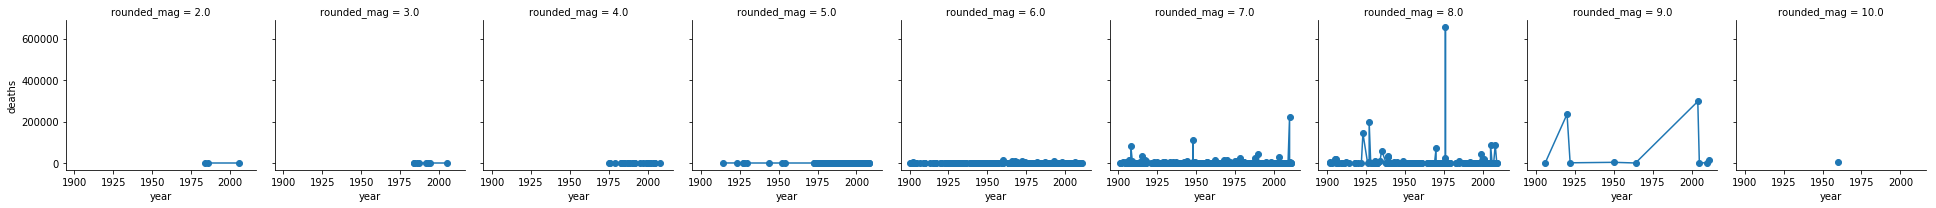

In [203]:
rounded_mag_grid = sns.FacetGrid(quake_df, col = 'rounded_mag')
rounded_mag_grid.map(plt.plot, 'year', 'deaths', marker = 'o')
plt.show()

#### It appears magnitudes 2-6.0 are not comparatively very lethal. And magnitudes 7-9 may yet reflect a change of lethality over time

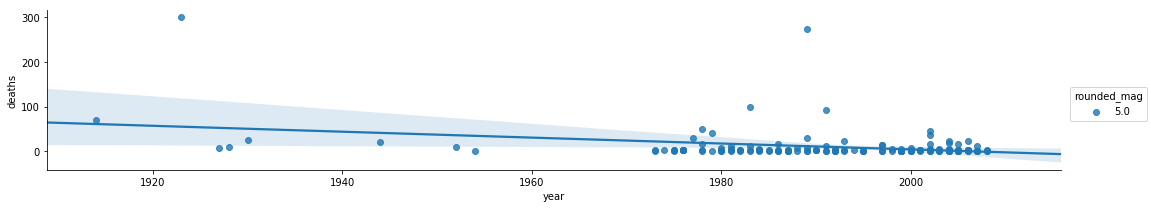

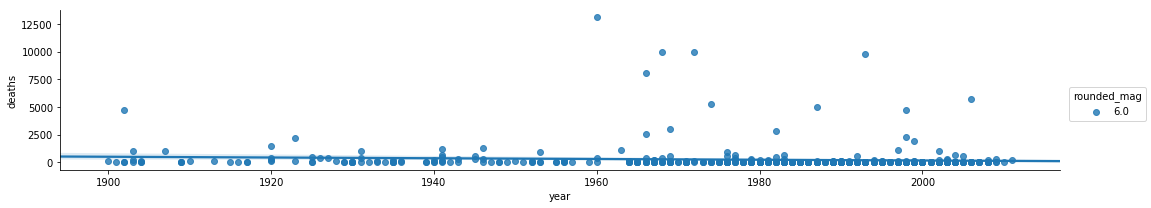

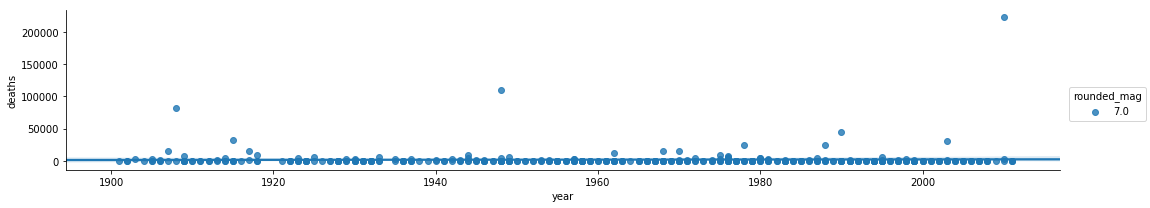

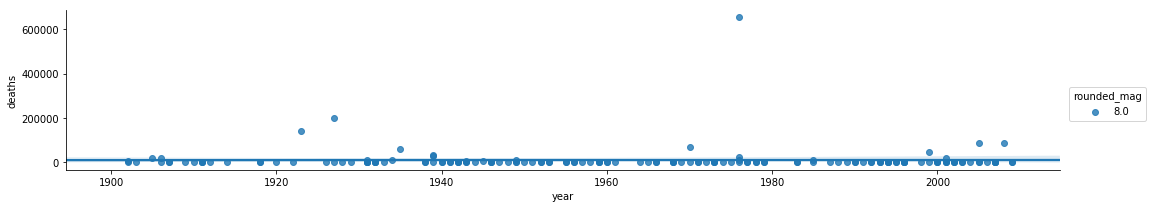

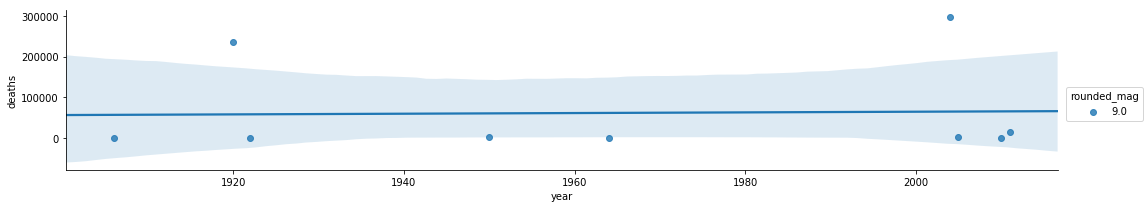

In [222]:
sns.lmplot(data = quake_df.query('rounded_mag == 5'), x='year', y='deaths', aspect = 5, size = 3, hue='rounded_mag')
sns.lmplot(data = quake_df.query('rounded_mag == 6'), x='year', y='deaths', aspect = 5, size = 3, hue='rounded_mag')
sns.lmplot(data = quake_df.query('rounded_mag == 7'), x='year', y='deaths', aspect = 5, size = 3, hue='rounded_mag')
sns.lmplot(data = quake_df.query('rounded_mag == 8'), x='year', y='deaths', aspect = 5, size = 3, hue='rounded_mag')
sns.lmplot(data = quake_df.query('rounded_mag == 9'), x='year', y='deaths', aspect = 5, size = 3, hue='rounded_mag')
plt.show()

even without normalizing the y axis we can see that the data does not support the hypothesis that lethality is changing over time. 